In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.base import BaseEstimator
import numpy as np

In [2]:
class EstimatorRssiBased(BaseEstimator):
    def __init__(self):
        return None

    def fit(self, x):
        return self 

    def predict(self, x):
        return [1.0]*len(x) 
    
    def decision_function(self, x, y=None):
        #x : [[rssi.a, rssi.b], [rssi.a, rssi.b], ...]
        values = [-np.max(x) for x in x]
        return values

    def score(self, x, y=None):
        scores = self.decision_function(x)
        return sum(scores)/len(scores)

    def get_params(self, deep=True):
        #return self.estimator.get_params(deep)
        return {}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter, value)
        return self
    
    def get_type(self):
        return 'rssi_based'

In [7]:
#import estimator_knn as knn
import sys
import notebookutil as nbu
sys.meta_path.append(nbu.NotebookFinder())
import datasets
import pandas as pd
import numpy as np
import roc_auc

#ds = datasets.load('data/raw/01_0[123]_0*_*')

In [4]:
#ds = datasets.load('data/raw/02_1[1234]_0*')

path = data/raw/02_1[1234]_0*
data/raw/02_11_01_エネマネハウス_iphone_胸ポケット_裏上_正常_まっすぐ帰宅
..............................
data/raw/02_11_02_エネマネハウス_iphone_カバン_裏上_正常_まっすぐ帰宅
..............................
data/raw/02_11_03_エネマネハウス_iphone_胸ポケット_裏上_正常_5秒後まっすぐ帰宅
..............................
data/raw/02_11_04_エネマネハウス_iphone_カバン_裏上_正常_5秒後まっすぐ帰宅
..............................
data/raw/02_12_01_エネマネハウス_iphone_胸ポケット_裏上_異常_まっすぐ外出
..............................
data/raw/02_12_02_エネマネハウス_iphone_ズボン_裏上_異常_まっすぐ外出
..............................
data/raw/02_12_03_エネマネハウス_iphone_カバン_裏上_異常_まっすぐ外出
..............................
data/raw/02_13_01_エネマネハウス_iphone_胸ポケット_裏上_異常_まっすぐ帰宅
..............................
data/raw/02_13_02_エネマネハウス_iphone_ズボン_裏上_異常_まっすぐ帰宅
..............................
data/raw/02_13_03_エネマネハウス_iphone_カバン_裏上_異常_まっすぐ帰宅
..............................
data/raw/02_14_01_エネマネハウス_iphone_胸ポケット_裏上_異常_エリア境界で静止
..............................
data/raw/02_14_02_エネマネハウス_iphone_カバン_裏上_異常_エリア境界で静止
.........

--normal score
[-1.1538143456850964, -0.72793454169117622, -0.077439844860763635, -1.0996457970228406, -0.91379016935700841, -0.64415402121069809, -0.64415402121069809, -0.89898418344789721, -1.7908897512780941, -1.0263992645664968, -0.63500672785826018, -1.2812294268036959, -0.63500672785826018, -0.63500672785826018, -1.7908897512780941, -1.4086445079222956, -1.4086445079222956, -0.64415402121069809, -1.0263992645664968, -1.1538143456850964, -2.3005500757524926, -2.427965156871092, -1.1538143456850964, -1.6634746701594947, -1.536059589040895, -1.9183048323966938, -1.536059589040895, -1.0263992645664968, -1.536059589040895, -1.2812294268036959, -0.0070786156177001774, 0.38719922430381681, 0.38719922430381681, 0.015487968972152462, 0.015487968972152462, 0.573054851969649, -0.26190877785489936, 0.015487968972152462, 0.10841578280506856, -0.077439844860763635, 0.20134359663798465, -0.0070786156177001774, -0.26190877785489936, 0.12033646550089939, -0.2632954725265958, 0.20134359663798465, 

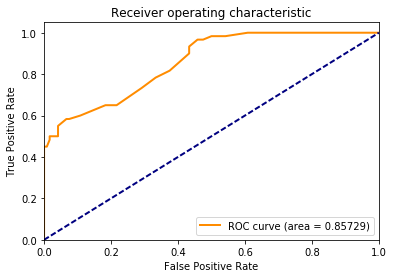

auc 0.85729


In [11]:
def eval01():
    #sensor_type = ['rssi.a','rssi.b', ['linear_accel[0]','linear_accel[1]','linear_accel[2]']]
    
    #sensor_type = ['rssi.a','rssi.b', ['gyro.rotation.x','gyro.rotation.y','gyro.rotation.z']]
    #sensor_type = ['rssi.a','rssi.b', ['gyro.rotationRate.x','gyro.rotationRate.y','gyro.rotationRate.z']]
    #sensor_type = ['rssi.a','rssi.b', ['userAcceleration.x','userAcceleration.y','userAcceleration.z']]
    #sensor_type = [['attitude.roll', 'attitude.pitch', 'attitude.yaw'], ['magneticField.x', 'magneticField.y', 'magneticField.z']]

    #sensor_type = [['magneticField.x', 'magneticField.y', 'magneticField.z']]

    sensor_type = ['rssi.a','rssi.b']
    n_record = 0
    n_record_after = 5
    drop_interval = 5
    ma_window = 1
    n_train = 5
    normalize = True
    
    # get data
    dfl_b = datasets.get_data(ds, title='02_11_01', before=n_record, after=n_record_after,
                              column=sensor_type, drop_interval=drop_interval)[:(n_train + 1)]
    dfl_n = datasets.get_data(ds, title='02_11', before=n_record, after=n_record_after,
                              column=sensor_type, drop_interval=drop_interval)
    dfl_o = datasets.get_data(ds, title='02_14', before=n_record, after=n_record_after,
                              column=sensor_type, drop_interval=drop_interval)
    
    # moving average
    dfl_b = datasets.moving_average(dfl_b, window=ma_window, min_periods=ma_window)
    dfl_n = datasets.moving_average(dfl_n, window=ma_window, min_periods=ma_window)
    dfl_o = datasets.moving_average(dfl_o, window=ma_window, min_periods=ma_window)
    
    # normalize
    if normalize == True:
        dfl_b_n = datasets.normalize_by_base_data(dfl_b, dfl_b, sensor_type)
        dfl_n_n = datasets.normalize_by_base_data(dfl_b, dfl_n, sensor_type)
        dfl_o_n = datasets.normalize_by_base_data(dfl_b, dfl_o, sensor_type)

    # get numpy array
    data_2d_b = [df.as_matrix() for df in dfl_b_n]
    data_2d_n = [df.as_matrix() for df in dfl_n_n]
    data_2d_o = [df.as_matrix() for df in dfl_o_n]

    # to list of numpy.array
    data_b = [d.ravel() for d in data_2d_b]
    data_n = [d.ravel() for d in data_2d_n]
    data_o = [d.ravel() for d in data_2d_o]

    model = EstimatorRssiBased()
    #model.fit(data_b, graph=True)
    model.fit(data_b)
    score_n = model.decision_function(data_n)
    score_o = model.decision_function(data_o)
    
    print('--normal score')
    print(score_n)
    print('--anomaly score')
    print(score_o)
    
    auc = roc_auc.get_auc_from_normal_outlier(score_n, score_o, graph=True)

    print('auc %.05f' % (auc))

#eval01()